### Original: [https://elitedatascience.com/python-seaborn-tutorial]

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
# read Pokemon dataset (csv)
# 1st column = IDs
# encoding avoids utf-8 encoding errors

df = pd.read_csv('Pokemon.csv', index_col=0, encoding = "ISO-8859-1")

In [5]:
# first 5 observations
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


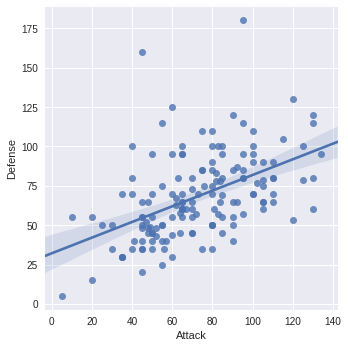

In [7]:
# default Seaborn scatterplot
# (Seaborn default uses regression fit function, hence the line.)

sns.lmplot(x='Attack', y='Defense', data=df)

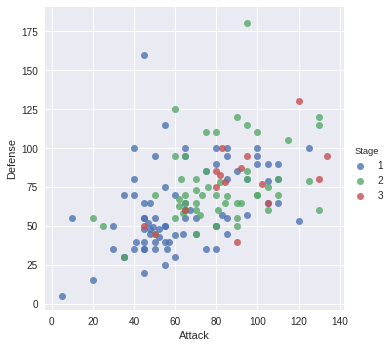

In [9]:
# remove regression line with fit_reg=False
# color-code datapoints with hue='Stage'

sns.lmplot(x='Attack', y='Defense', data=df,
          fit_reg=False, hue='Stage')

(0, 142.25647612435475)

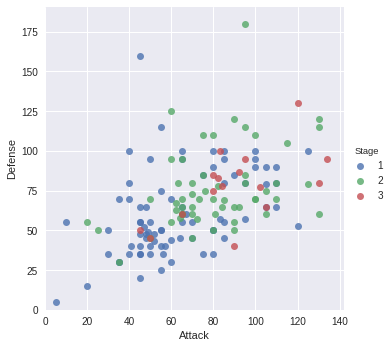

In [10]:
# invoke Matplotlib customization with ylim(), xlim() functions

sns.lmplot(x='Attack', y='Defense', data=df,
          fit_reg=False, hue='Stage')

plt.ylim(0,None)
plt.xlim(0,None)

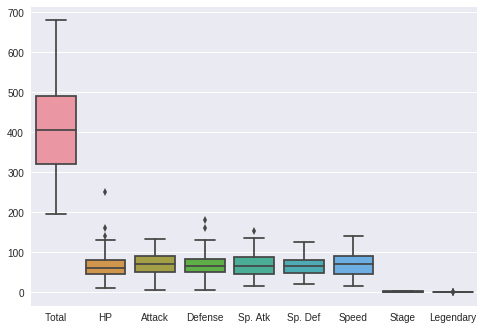

In [11]:
# default boxplot

sns.boxplot(data=df)

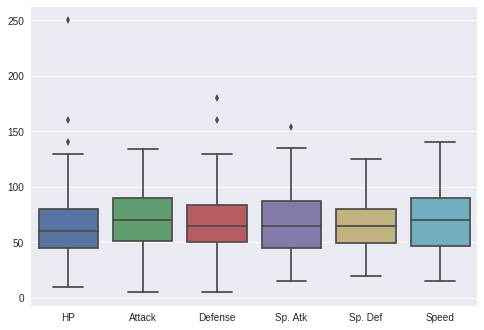

In [12]:
# remove Total - we have individual stats
# remove Stage & Legendary cols - they aren't combat stats
# much easier to pre-format the DataFrame

stats_df = df.drop(['Total','Stage','Legendary'], axis=1)

sns.boxplot(data=stats_df)

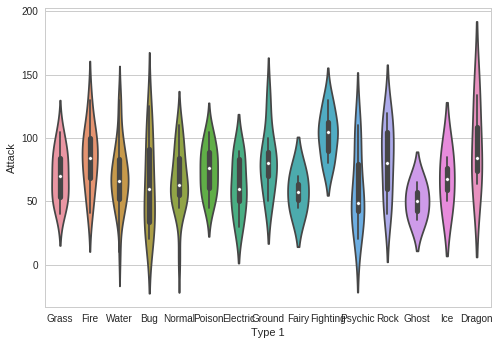

In [13]:
# Seaborn themes
# Chg from default 'darkgrid' to 'whitegrid'
# Chg plot type from box plot to violin plot

sns.set_style('whitegrid')
sns.violinplot(x='Type 1',y='Attack',data=df)

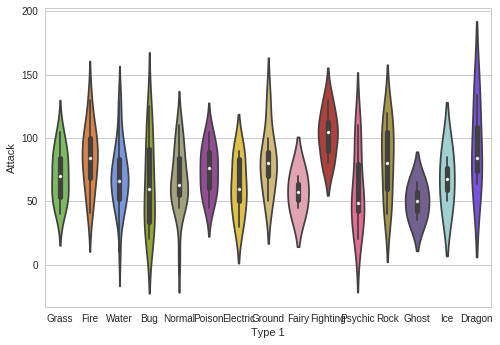

In [14]:
# custom color pallettes
# created via Bulbapedia (http://bulbapedia.bulbagarden.net/wiki/Category:Type_color_templates)

pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

sns.violinplot(x='Type 1', y='Attack', data=df, 
               palette=pkmn_type_colors)

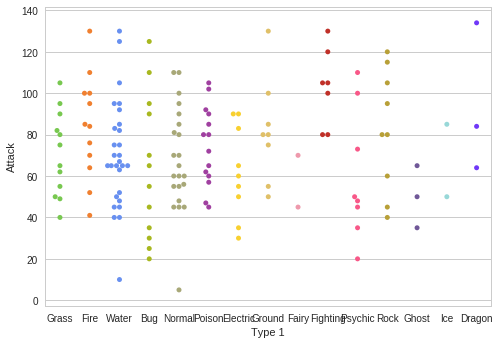

In [15]:
# swarm plots - when you simply want to display each point
# while stacking those with similar values

sns.swarmplot(x='Type 1', y='Attack', data=df, 
              palette=pkmn_type_colors)

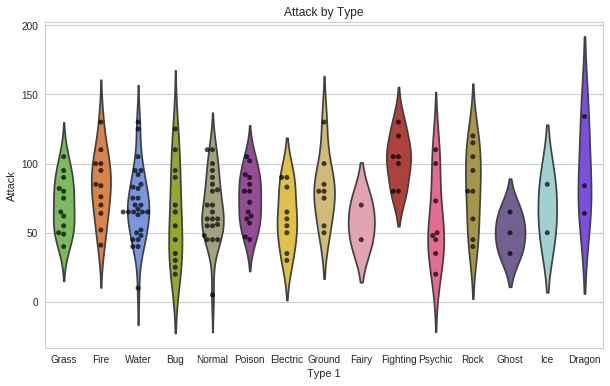

In [16]:
# overlaid plots
# enlarge figure with Matplotlib
# create violin plot with inner=None to remove bars
# create swarm plot with black dots for better contrast
# set title with Matplotlib

plt.figure(figsize=(10,6))
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent

plt.title('Attack by Type')

In [17]:
# reminder - initial data format
stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


In [18]:
# use Pandas melt() to combine selected stats

melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat") # Name of melted variable
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


In [19]:
print( stats_df.shape)
print( melted_df.shape)

(151, 9)
(906, 5)


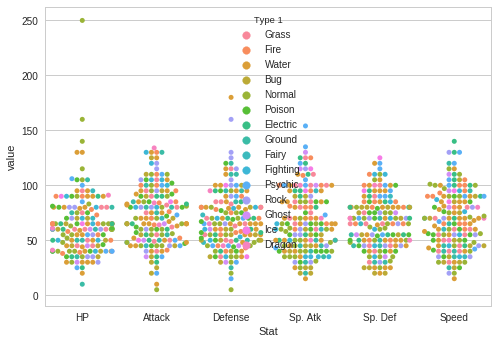

In [20]:
# make swarm plot with melted dataset
# use x='Stat', y='value' to separate swarms by stat
# use hue='Type 1' to color points by Pokemon type

sns.swarmplot(x='Stat', y='value', data=melted_df, 
              hue='Type 1')

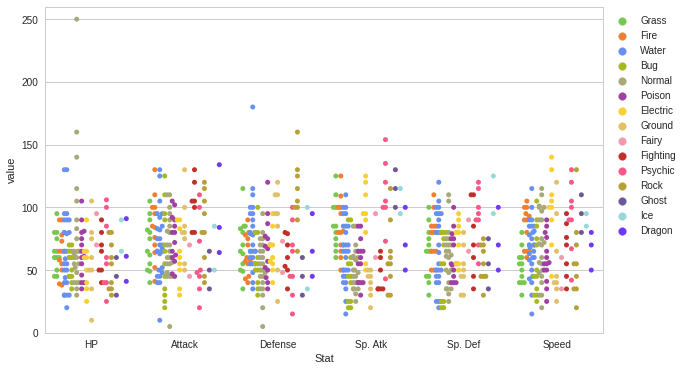

In [21]:
# enlarge plot
# separate points by hue using split=True
# use custom Pokemon color pallette
# adjust y-axis limit to end at 0
# place legend on right

plt.figure(figsize=(10,6))
 
sns.swarmplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='Type 1', 
              split=True, # 2. Separate points by hue
              palette=pkmn_type_colors) # 3. Use Pokemon palette
 
# 4. Adjust the y-axis
plt.ylim(0, 260)
 
# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

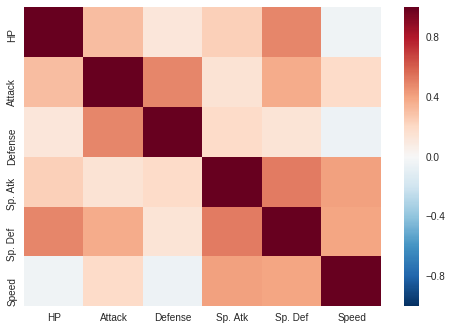

In [22]:
# correlations heatmap

corr = stats_df.corr()
sns.heatmap(corr)

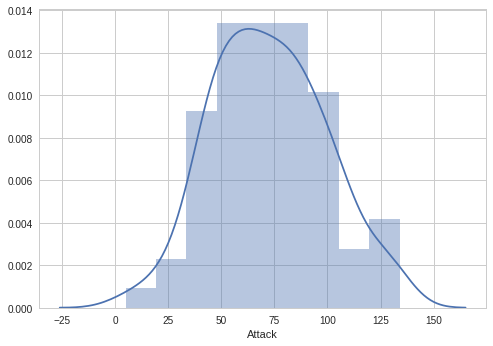

In [23]:
# distributions histogram

sns.distplot(df.Attack)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

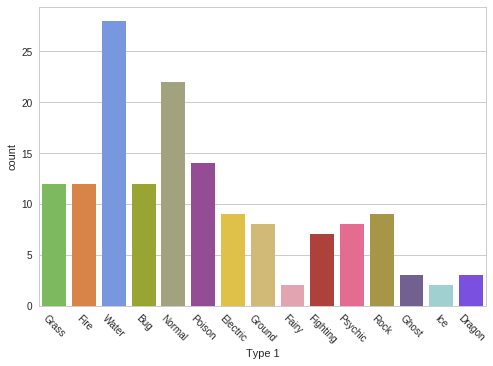

In [24]:
# category distributions bar plot

sns.countplot(x='Type 1',data=df,palette=pkmn_type_colors)
plt.xticks(rotation=-45)

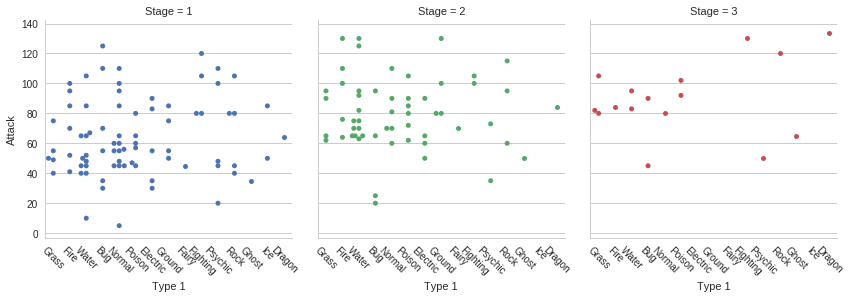

In [25]:
# category separation with factor plots

g = sns.factorplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot

g.set_xticklabels(rotation=-45)

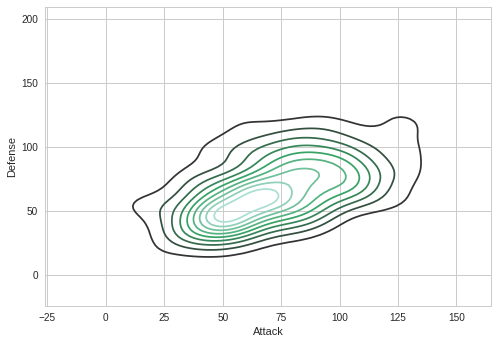

In [26]:
# 2-variable distribution with density plot
sns.kdeplot(df.Attack,df.Defense)

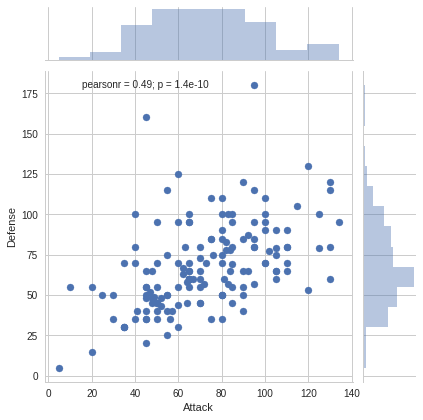

In [27]:
# bivariate distribution info with joint distribution plot
sns.jointplot(x='Attack',y='Defense',data=df)